## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9770866	total: 70.4ms	remaining: 1m 10s
1:	learn: 0.9592204	total: 71.5ms	remaining: 35.7s
2:	learn: 0.9387678	total: 72.5ms	remaining: 24.1s
3:	learn: 0.9227496	total: 73.6ms	remaining: 18.3s
4:	learn: 0.9052760	total: 74.8ms	remaining: 14.9s
5:	learn: 0.8874500	total: 75.8ms	remaining: 12.5s
6:	learn: 0.8712033	total: 76.7ms	remaining: 10.9s
7:	learn: 0.8550482	total: 77.7ms	remaining: 9.63s
8:	learn: 0.8391850	total: 78.6ms	remaining: 8.65s
9:	learn: 0.8222521	total: 79.5ms	remaining: 7.87s
10:	learn: 0.8071232	total: 80.4ms	remaining: 7.23s
11:	learn: 0.7927777	total: 81.2ms	remaining: 6.69s
12:	learn: 0.7773687	total: 82.1ms	remaining: 6.23s
13:	learn: 0.7630184	total: 82.9ms	remaining: 5.84s
14:	learn: 0.7501626	total: 83.8ms	remaining: 5.5s
15:	learn: 0.7360590	total: 84.7ms	remaining: 5.21s
16:	learn: 0.7245823	total: 86.3ms	remaining: 4.99s
17:	learn: 0.7119084	total: 87.1ms	remaining: 4.75s
18:	learn: 0.6994126	total: 87.9ms	remaining

45:	learn: 0.4768147	total: 109ms	remaining: 2.26s
46:	learn: 0.4716723	total: 110ms	remaining: 2.23s
47:	learn: 0.4659637	total: 111ms	remaining: 2.2s
48:	learn: 0.4603943	total: 112ms	remaining: 2.16s
49:	learn: 0.4552215	total: 112ms	remaining: 2.13s
50:	learn: 0.4496938	total: 113ms	remaining: 2.11s
51:	learn: 0.4439704	total: 114ms	remaining: 2.08s
52:	learn: 0.4383186	total: 115ms	remaining: 2.06s
53:	learn: 0.4349319	total: 116ms	remaining: 2.03s
54:	learn: 0.4304133	total: 117ms	remaining: 2.01s
55:	learn: 0.4267729	total: 118ms	remaining: 1.99s
56:	learn: 0.4225172	total: 119ms	remaining: 1.96s
57:	learn: 0.4179813	total: 120ms	remaining: 1.94s
58:	learn: 0.4149531	total: 121ms	remaining: 1.92s
59:	learn: 0.4110787	total: 121ms	remaining: 1.9s
60:	learn: 0.4064414	total: 122ms	remaining: 1.88s
61:	learn: 0.4021482	total: 124ms	remaining: 1.87s
62:	learn: 0.3993049	total: 125ms	remaining: 1.86s
63:	learn: 0.3949259	total: 126ms	remaining: 1.84s
64:	learn: 0.3914908	total: 127ms

144:	learn: 0.2597957	total: 192ms	remaining: 1.13s
145:	learn: 0.2591508	total: 193ms	remaining: 1.13s
146:	learn: 0.2585223	total: 194ms	remaining: 1.13s
147:	learn: 0.2578955	total: 195ms	remaining: 1.12s
148:	learn: 0.2572236	total: 196ms	remaining: 1.12s
149:	learn: 0.2564842	total: 197ms	remaining: 1.11s
150:	learn: 0.2559560	total: 198ms	remaining: 1.11s
151:	learn: 0.2552672	total: 198ms	remaining: 1.11s
152:	learn: 0.2547389	total: 199ms	remaining: 1.1s
153:	learn: 0.2540269	total: 200ms	remaining: 1.1s
154:	learn: 0.2535764	total: 201ms	remaining: 1.09s
155:	learn: 0.2524888	total: 202ms	remaining: 1.09s
156:	learn: 0.2515483	total: 203ms	remaining: 1.09s
157:	learn: 0.2510360	total: 203ms	remaining: 1.08s
158:	learn: 0.2503229	total: 204ms	remaining: 1.08s
159:	learn: 0.2499461	total: 205ms	remaining: 1.07s
160:	learn: 0.2493157	total: 206ms	remaining: 1.07s
161:	learn: 0.2491329	total: 206ms	remaining: 1.07s
162:	learn: 0.2485229	total: 207ms	remaining: 1.06s
163:	learn: 0.

269:	learn: 0.2014695	total: 300ms	remaining: 811ms
270:	learn: 0.2014179	total: 301ms	remaining: 809ms
271:	learn: 0.2009174	total: 302ms	remaining: 807ms
272:	learn: 0.2003711	total: 302ms	remaining: 806ms
273:	learn: 0.2002002	total: 303ms	remaining: 803ms
274:	learn: 0.1998829	total: 304ms	remaining: 802ms
275:	learn: 0.1996756	total: 305ms	remaining: 800ms
276:	learn: 0.1995479	total: 306ms	remaining: 798ms
277:	learn: 0.1994462	total: 306ms	remaining: 796ms
278:	learn: 0.1988465	total: 307ms	remaining: 794ms
279:	learn: 0.1985746	total: 308ms	remaining: 792ms
280:	learn: 0.1981004	total: 309ms	remaining: 790ms
281:	learn: 0.1976829	total: 310ms	remaining: 789ms
282:	learn: 0.1975720	total: 311ms	remaining: 787ms
283:	learn: 0.1973068	total: 311ms	remaining: 785ms
284:	learn: 0.1969503	total: 313ms	remaining: 785ms
285:	learn: 0.1968896	total: 314ms	remaining: 783ms
286:	learn: 0.1966906	total: 315ms	remaining: 781ms
287:	learn: 0.1960680	total: 315ms	remaining: 780ms
288:	learn: 

364:	learn: 0.1683090	total: 383ms	remaining: 667ms
365:	learn: 0.1678133	total: 384ms	remaining: 666ms
366:	learn: 0.1675158	total: 385ms	remaining: 664ms
367:	learn: 0.1672776	total: 386ms	remaining: 663ms
368:	learn: 0.1669045	total: 387ms	remaining: 661ms
369:	learn: 0.1665081	total: 388ms	remaining: 660ms
370:	learn: 0.1659658	total: 388ms	remaining: 658ms
371:	learn: 0.1654952	total: 389ms	remaining: 657ms
372:	learn: 0.1650332	total: 390ms	remaining: 656ms
373:	learn: 0.1648474	total: 391ms	remaining: 654ms
374:	learn: 0.1645078	total: 392ms	remaining: 653ms
375:	learn: 0.1640561	total: 392ms	remaining: 651ms
376:	learn: 0.1635632	total: 393ms	remaining: 650ms
377:	learn: 0.1634826	total: 394ms	remaining: 648ms
378:	learn: 0.1630309	total: 395ms	remaining: 647ms
379:	learn: 0.1625871	total: 395ms	remaining: 645ms
380:	learn: 0.1621918	total: 396ms	remaining: 644ms
381:	learn: 0.1615206	total: 397ms	remaining: 642ms
382:	learn: 0.1612120	total: 398ms	remaining: 641ms
383:	learn: 

492:	learn: 0.1341577	total: 491ms	remaining: 505ms
493:	learn: 0.1340796	total: 492ms	remaining: 504ms
494:	learn: 0.1336683	total: 493ms	remaining: 503ms
495:	learn: 0.1334030	total: 493ms	remaining: 501ms
496:	learn: 0.1328948	total: 494ms	remaining: 500ms
497:	learn: 0.1326331	total: 495ms	remaining: 499ms
498:	learn: 0.1324147	total: 496ms	remaining: 498ms
499:	learn: 0.1320322	total: 497ms	remaining: 497ms
500:	learn: 0.1318978	total: 497ms	remaining: 495ms
501:	learn: 0.1317699	total: 498ms	remaining: 494ms
502:	learn: 0.1314895	total: 499ms	remaining: 493ms
503:	learn: 0.1313700	total: 500ms	remaining: 492ms
504:	learn: 0.1313096	total: 500ms	remaining: 491ms
505:	learn: 0.1310577	total: 501ms	remaining: 489ms
506:	learn: 0.1307993	total: 502ms	remaining: 488ms
507:	learn: 0.1303710	total: 503ms	remaining: 487ms
508:	learn: 0.1302046	total: 504ms	remaining: 486ms
509:	learn: 0.1299550	total: 505ms	remaining: 485ms
510:	learn: 0.1297400	total: 505ms	remaining: 484ms
511:	learn: 

594:	learn: 0.1112275	total: 574ms	remaining: 391ms
595:	learn: 0.1110113	total: 575ms	remaining: 390ms
596:	learn: 0.1107949	total: 576ms	remaining: 389ms
597:	learn: 0.1106400	total: 577ms	remaining: 388ms
598:	learn: 0.1103574	total: 577ms	remaining: 386ms
599:	learn: 0.1102266	total: 578ms	remaining: 385ms
600:	learn: 0.1100021	total: 579ms	remaining: 384ms
601:	learn: 0.1098587	total: 580ms	remaining: 383ms
602:	learn: 0.1096979	total: 581ms	remaining: 382ms
603:	learn: 0.1094125	total: 581ms	remaining: 381ms
604:	learn: 0.1091603	total: 582ms	remaining: 380ms
605:	learn: 0.1090305	total: 583ms	remaining: 379ms
606:	learn: 0.1088443	total: 584ms	remaining: 378ms
607:	learn: 0.1087364	total: 585ms	remaining: 377ms
608:	learn: 0.1086031	total: 585ms	remaining: 376ms
609:	learn: 0.1084723	total: 586ms	remaining: 375ms
610:	learn: 0.1081415	total: 587ms	remaining: 374ms
611:	learn: 0.1079779	total: 588ms	remaining: 373ms
612:	learn: 0.1077315	total: 589ms	remaining: 372ms
613:	learn: 

727:	learn: 0.0900378	total: 682ms	remaining: 255ms
728:	learn: 0.0899612	total: 683ms	remaining: 254ms
729:	learn: 0.0898773	total: 683ms	remaining: 253ms
730:	learn: 0.0897598	total: 684ms	remaining: 252ms
731:	learn: 0.0897046	total: 685ms	remaining: 251ms
732:	learn: 0.0895933	total: 686ms	remaining: 250ms
733:	learn: 0.0895222	total: 687ms	remaining: 249ms
734:	learn: 0.0894866	total: 688ms	remaining: 248ms
735:	learn: 0.0893968	total: 688ms	remaining: 247ms
736:	learn: 0.0893221	total: 689ms	remaining: 246ms
737:	learn: 0.0892285	total: 690ms	remaining: 245ms
738:	learn: 0.0890387	total: 691ms	remaining: 244ms
739:	learn: 0.0889339	total: 691ms	remaining: 243ms
740:	learn: 0.0888316	total: 692ms	remaining: 242ms
741:	learn: 0.0886804	total: 693ms	remaining: 241ms
742:	learn: 0.0885967	total: 694ms	remaining: 240ms
743:	learn: 0.0884310	total: 695ms	remaining: 239ms
744:	learn: 0.0882692	total: 695ms	remaining: 238ms
745:	learn: 0.0880671	total: 696ms	remaining: 237ms
746:	learn: 

827:	learn: 0.0787433	total: 765ms	remaining: 159ms
828:	learn: 0.0786387	total: 766ms	remaining: 158ms
829:	learn: 0.0785862	total: 767ms	remaining: 157ms
830:	learn: 0.0784270	total: 767ms	remaining: 156ms
831:	learn: 0.0783239	total: 768ms	remaining: 155ms
832:	learn: 0.0783125	total: 769ms	remaining: 154ms
833:	learn: 0.0781981	total: 770ms	remaining: 153ms
834:	learn: 0.0780054	total: 771ms	remaining: 152ms
835:	learn: 0.0779950	total: 772ms	remaining: 151ms
836:	learn: 0.0779203	total: 772ms	remaining: 150ms
837:	learn: 0.0777778	total: 773ms	remaining: 149ms
838:	learn: 0.0777102	total: 774ms	remaining: 149ms
839:	learn: 0.0775940	total: 775ms	remaining: 148ms
840:	learn: 0.0774584	total: 776ms	remaining: 147ms
841:	learn: 0.0773962	total: 776ms	remaining: 146ms
842:	learn: 0.0772243	total: 777ms	remaining: 145ms
843:	learn: 0.0771115	total: 778ms	remaining: 144ms
844:	learn: 0.0770070	total: 779ms	remaining: 143ms
845:	learn: 0.0769165	total: 780ms	remaining: 142ms
846:	learn: 

956:	learn: 0.0664951	total: 872ms	remaining: 39.2ms
957:	learn: 0.0663786	total: 873ms	remaining: 38.3ms
958:	learn: 0.0662965	total: 874ms	remaining: 37.4ms
959:	learn: 0.0662217	total: 875ms	remaining: 36.5ms
960:	learn: 0.0661266	total: 876ms	remaining: 35.5ms
961:	learn: 0.0660757	total: 876ms	remaining: 34.6ms
962:	learn: 0.0659684	total: 877ms	remaining: 33.7ms
963:	learn: 0.0659061	total: 878ms	remaining: 32.8ms
964:	learn: 0.0658187	total: 879ms	remaining: 31.9ms
965:	learn: 0.0657683	total: 880ms	remaining: 31ms
966:	learn: 0.0656252	total: 881ms	remaining: 30.1ms
967:	learn: 0.0655350	total: 882ms	remaining: 29.1ms
968:	learn: 0.0654766	total: 882ms	remaining: 28.2ms
969:	learn: 0.0654540	total: 883ms	remaining: 27.3ms
970:	learn: 0.0653471	total: 884ms	remaining: 26.4ms
971:	learn: 0.0652740	total: 885ms	remaining: 25.5ms
972:	learn: 0.0652070	total: 886ms	remaining: 24.6ms
973:	learn: 0.0651160	total: 886ms	remaining: 23.7ms
974:	learn: 0.0650270	total: 887ms	remaining: 22

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

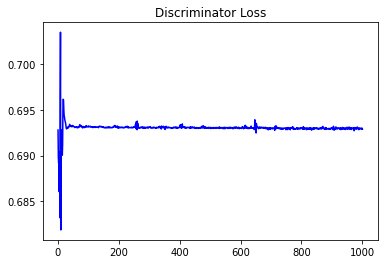

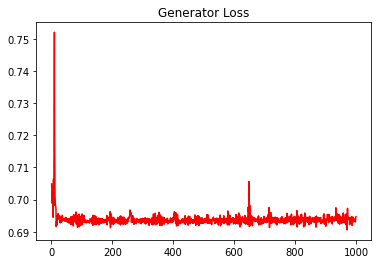

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1162795661229223


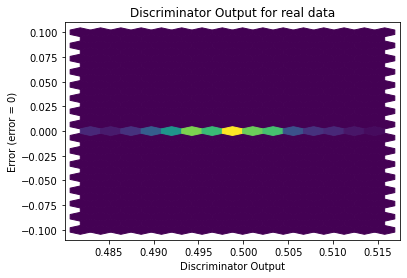

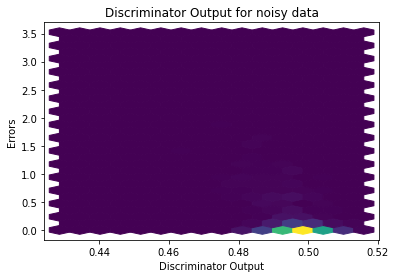

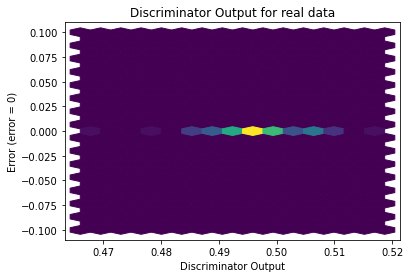

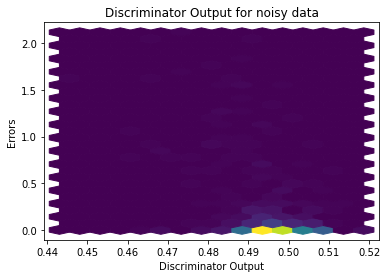

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


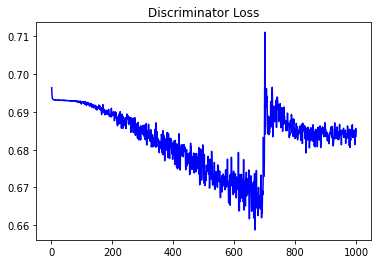

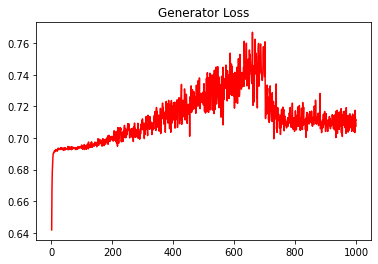

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12989234368838767


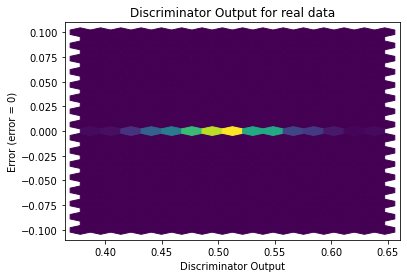

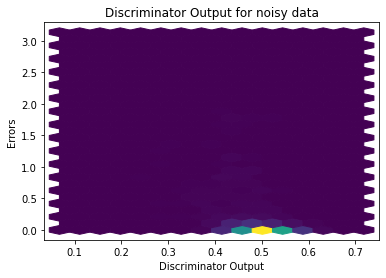

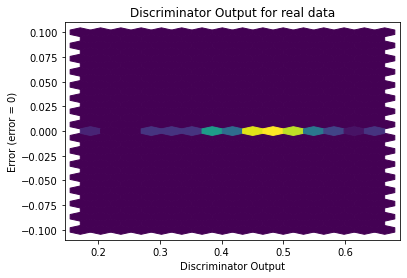

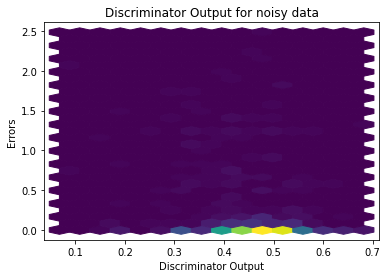

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0770]], requires_grad=True)
